<a href="https://colab.research.google.com/github/nassimch12/ML-Work/blob/notebook%2Fchurn-model/P2_ML_Project__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC

In [ ]:
# Load the training dataset
train_df = pd.read_csv('churn-bigml-80.csv')

# Load the testing dataset
test_df = pd.read_csv('churn-bigml-20.csv')

In [ ]:
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False




----

# **Data Cleaning**


## Missing values

In [ ]:
#Check for missing values
print("Missing values in training dataset:\n", train_df.isnull().sum())
print("\nMissing values in testing dataset:\n", test_df.isnull().sum())

Missing values in training dataset:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Missing values in testing dataset:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minut

***No Missing values found***

## Data Types

In [ ]:
#Check for inconsistent data types or values
print("\nData types in training dataset:\n", train_df.dtypes)
print("\nData types in testing dataset:\n", test_df.dtypes)


Data types in training dataset:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Data types in testing dataset:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
T

##Encoding

In [ ]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical features in the training dataset
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])

# Encode categorical features in the testing dataset using the same mappings as the training dataset
for col in categorical_cols:
    test_df[col] = le.fit_transform(test_df[col]) # Use fit_transform on test data as well to ensure consistency.

## Outliers

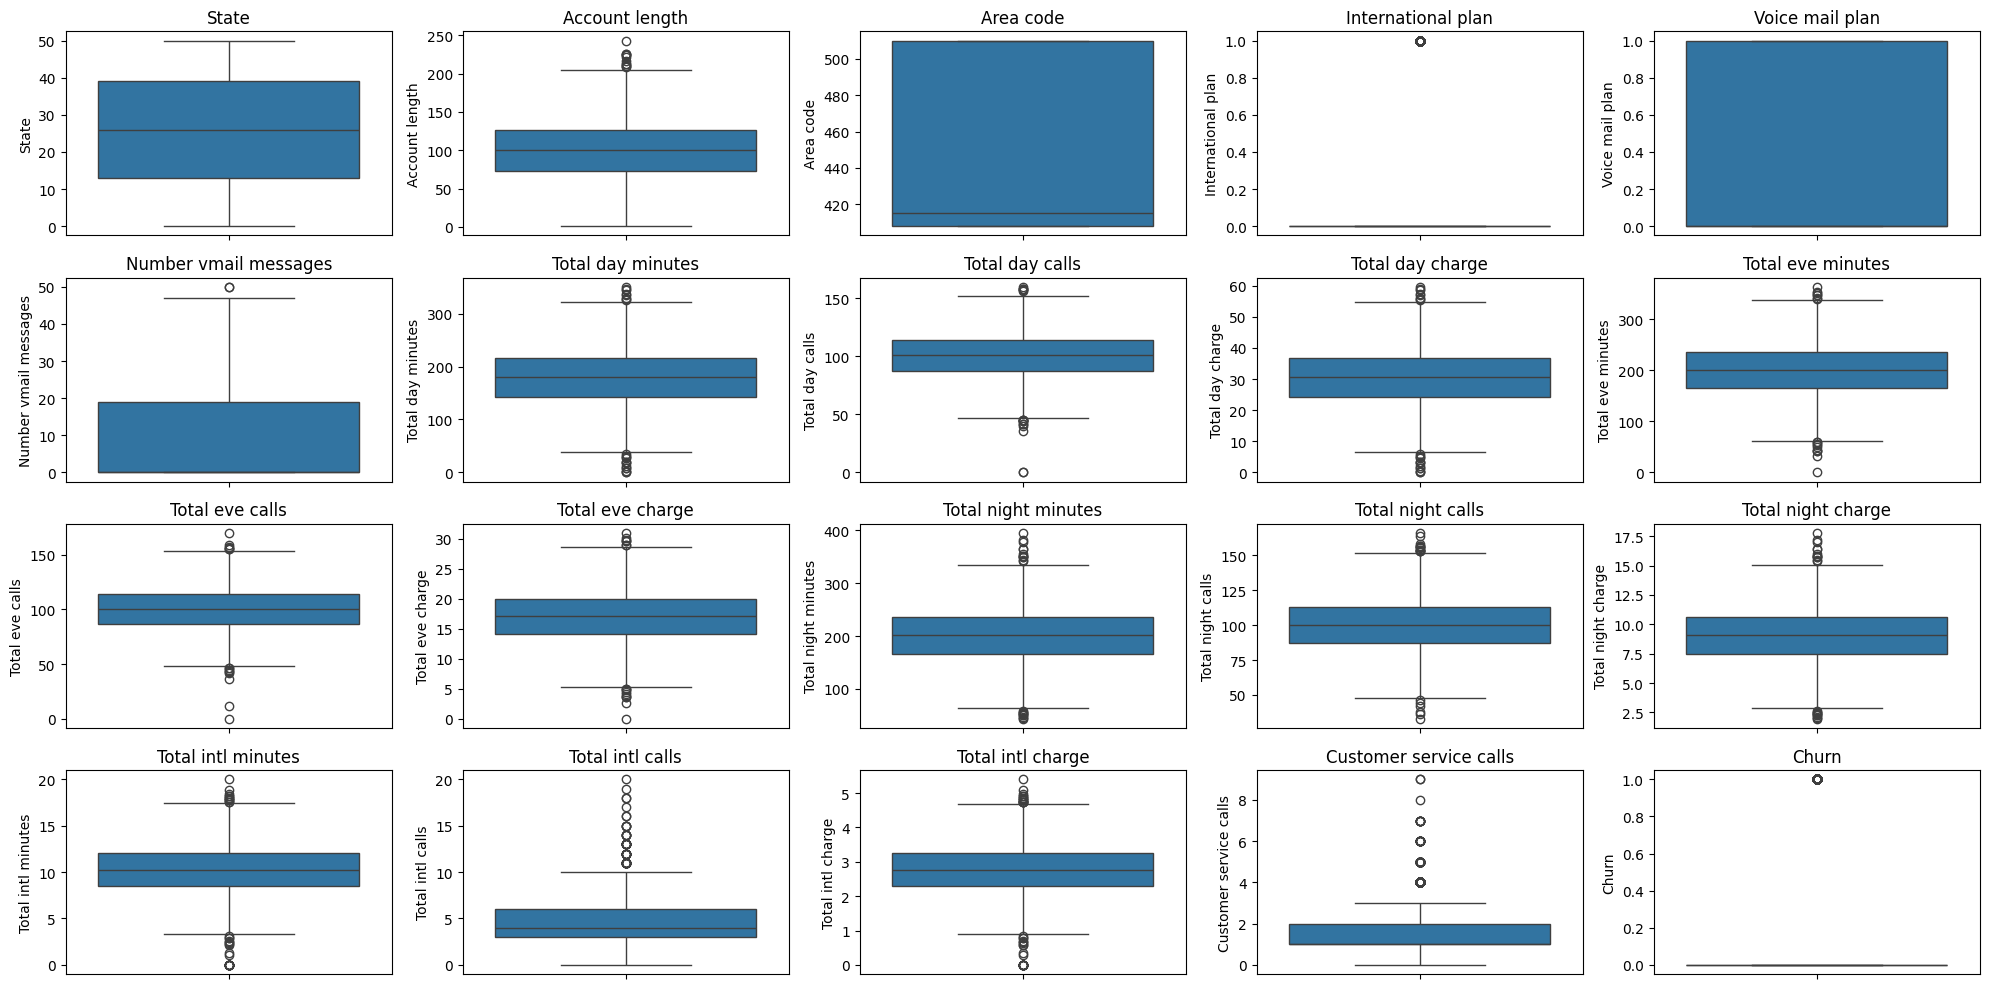

In [ ]:
# Outlier detection and visualization using boxplots
plt.figure(figsize=(20, 10))
for i, col in enumerate(train_df.columns):
    if train_df[col].dtype != 'object':
        plt.subplot(4, 5, i + 1)
        sns.boxplot(y=train_df[col])
        plt.title(col)
plt.tight_layout()
plt.show()

***Many outliers found in multiple columns***

In [ ]:
# Outlier handling
def handle_outliers(df):
    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.4 * IQR
        upper_bound = Q3 + 1.4 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

train_df = handle_outliers(train_df)
test_df = handle_outliers(test_df)

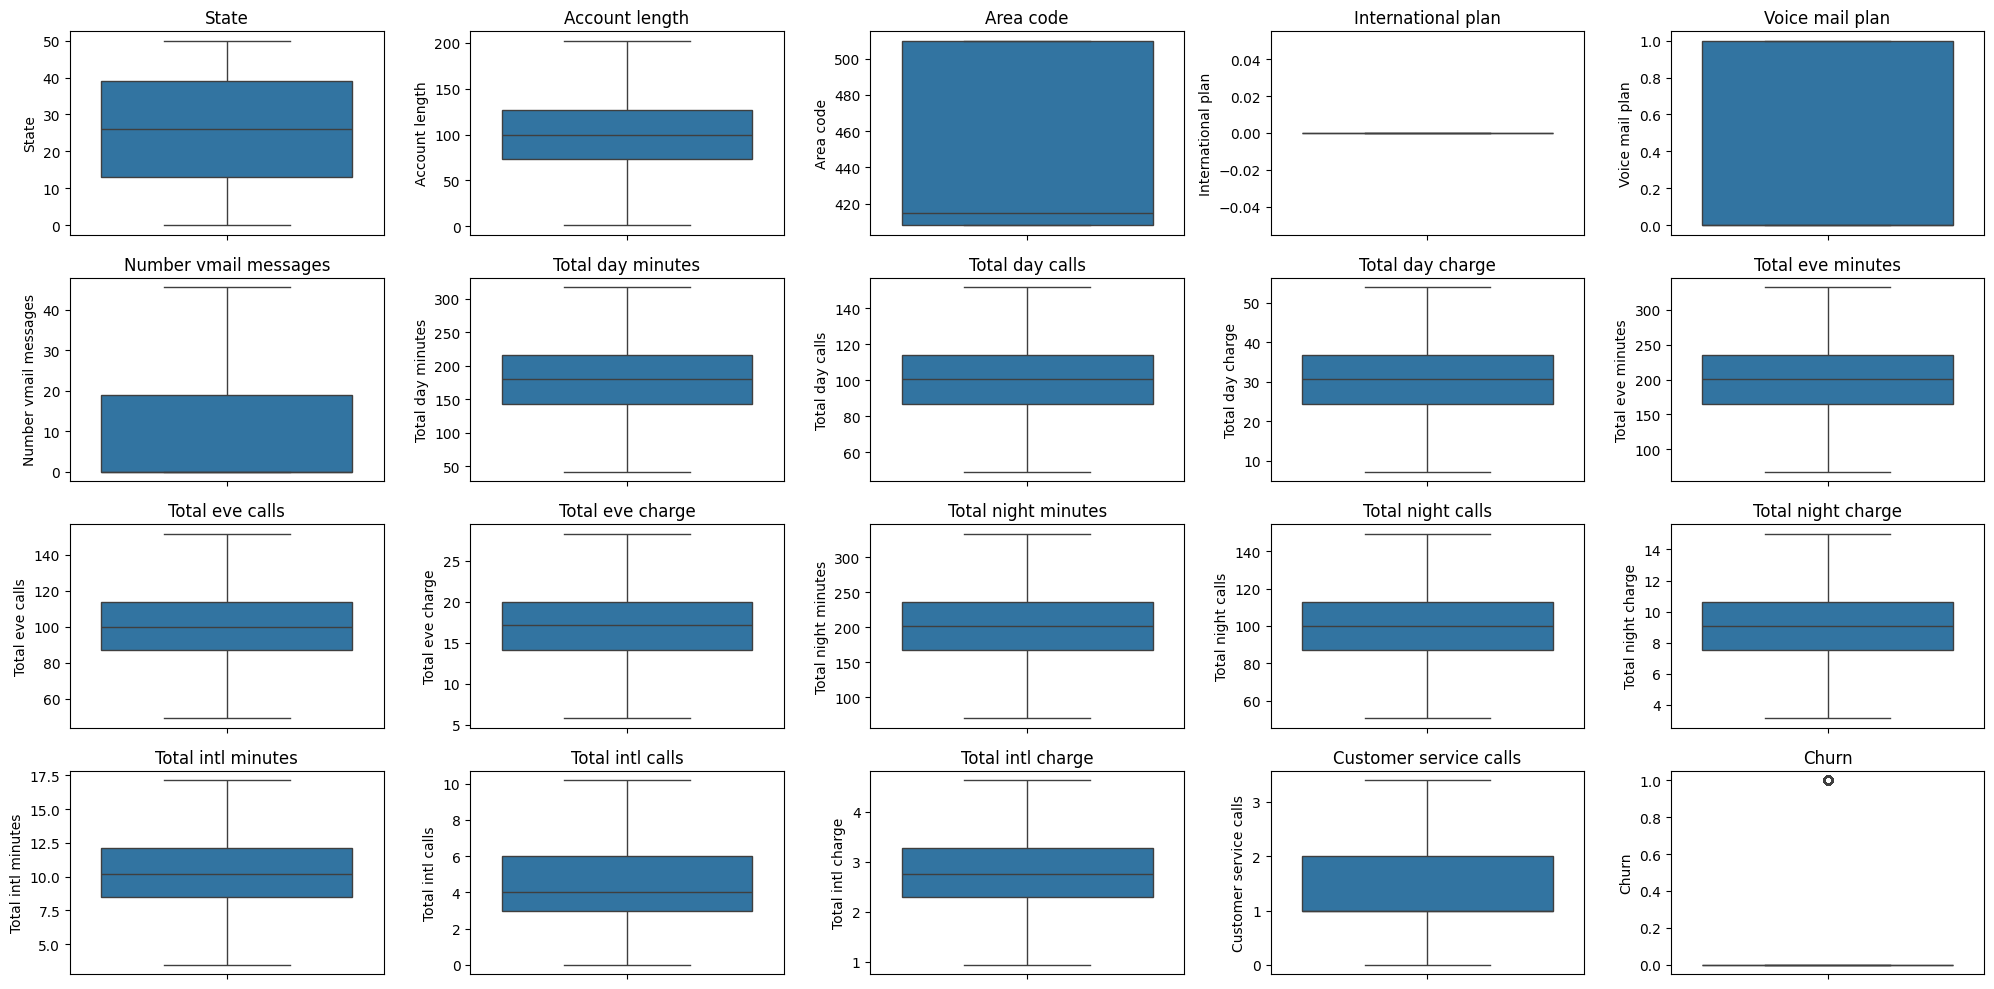

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(train_df.columns):
    if train_df[col].dtype != 'object':
        plt.subplot(4, 5, i + 1)
        sns.boxplot(y=train_df[col])
        plt.title(col)
plt.tight_layout()
plt.show()

***Outliers have been removed***

## Correlation

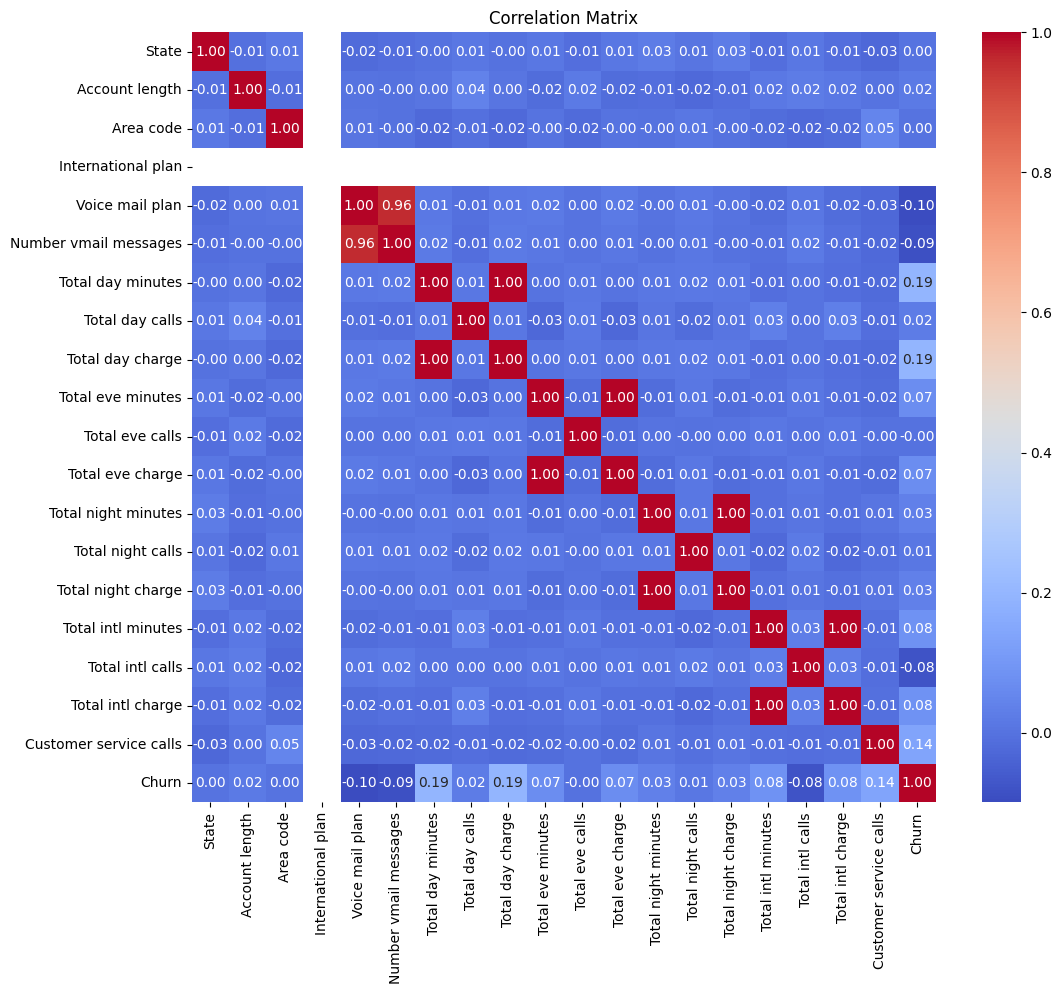

In [ ]:
# Correlation matrix visualization using a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***These colmuns are heavily correlated and will be removed: 'Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'***

In [ ]:
# Drop the specified columns
columns_to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

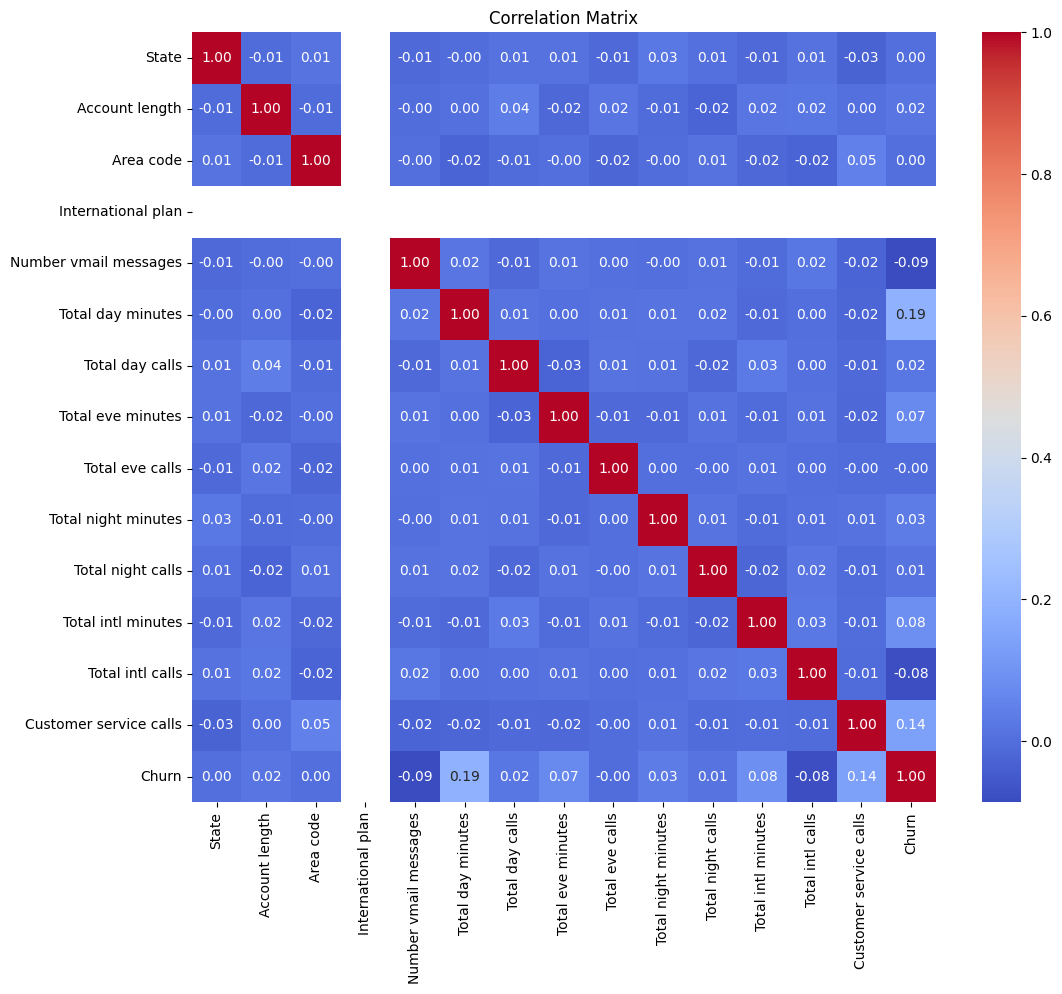

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***Heavily correlated columns removed***

## Data Balancing

In [ ]:
print(train_df['Churn'].value_counts())

Churn
False    2278
True      388
Name: count, dtype: int64


***The Churn Column is unbalanced***

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

### Balancing the Training set

In [ ]:
# Separate features (X) and target variable (y)
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply Edited Nearest Neighbours for undersampling
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

print(pd.Series(y_resampled).value_counts())

Churn
False    2278
True     2159
Name: count, dtype: int64




----



# **Modeling**

## **Decision Tree**

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator (model with the best parameters)
best_clf = grid_search.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.917978152899235


In [ ]:
# Make predictions on the test set
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.92      0.93       572
        True       0.59      0.65      0.62        95

    accuracy                           0.89       667
   macro avg       0.77      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667



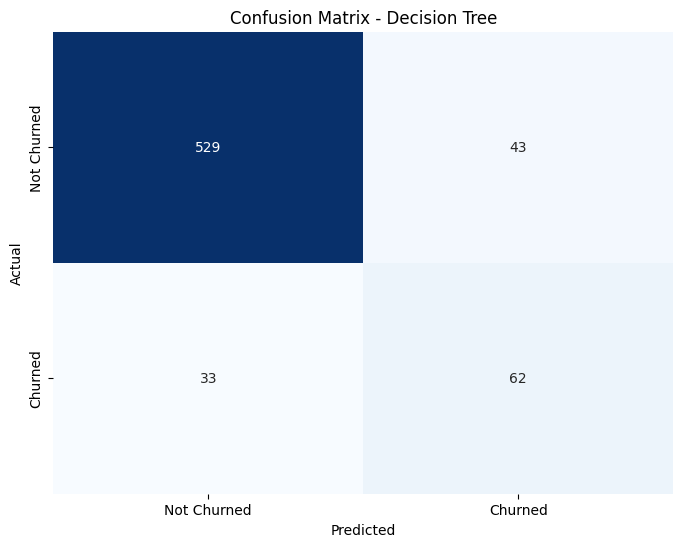

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

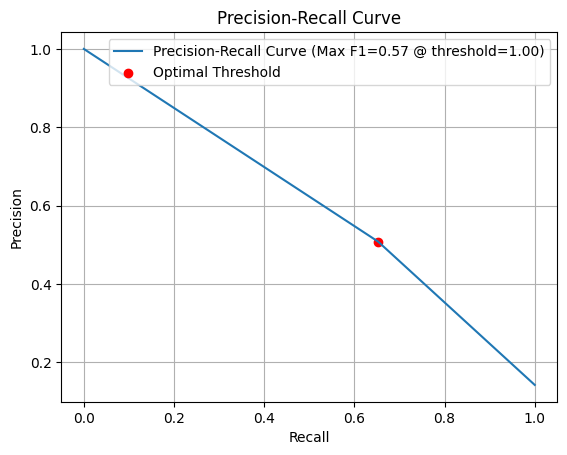

In [ ]:
# Assuming y_test and y_pred are already defined from your previous code
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = [0 if x != x else x for x in f1_scores] # handles cases where precision+recall is zero

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

plt.plot(recall, precision, label=f'Precision-Recall Curve (Max F1={optimal_f1:.2f} @ threshold={optimal_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

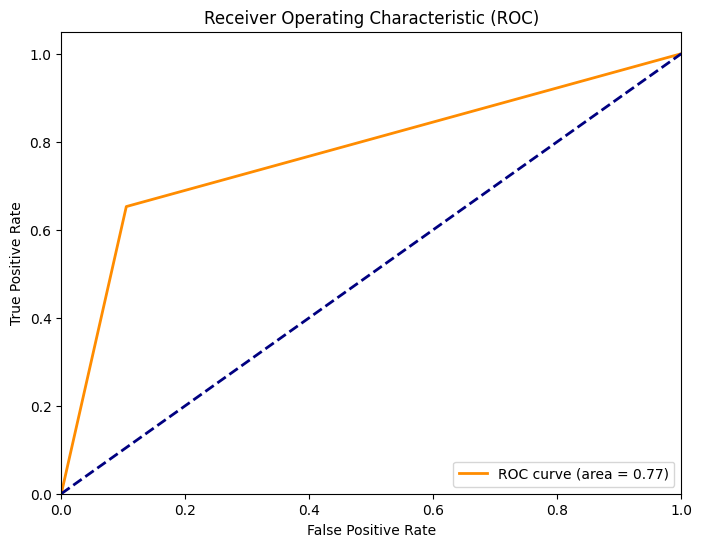

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **SVM**

In [ ]:
svm_model = SVC(random_state=42, probability=True)
svm_param_grid = {
    'C': [5, 10],
    'kernel': ['linear', 'poly'],
}

svm_grid_search = GridSearchCV(
    svm_model,
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
svm_grid_search.fit(X_resampled, y_resampled)
best_svm = svm_grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
svm_cv_scores = cross_val_score(best_svm, X_resampled, y_resampled, cv=5)
print(f"SVM Cross-validation scores: {svm_cv_scores}")
print(f"SVM Average CV score: {svm_cv_scores.mean()}")

SVM Cross-validation scores: [0.70382883 0.69144144 0.72378805 0.72153326 0.72491545]
SVM Average CV score: 0.7131014046741218


In [ ]:
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]

In [ ]:
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.87      0.89       572
        True       0.40      0.52      0.45        95

    accuracy                           0.82       667
   macro avg       0.66      0.69      0.67       667
weighted avg       0.84      0.82      0.83       667



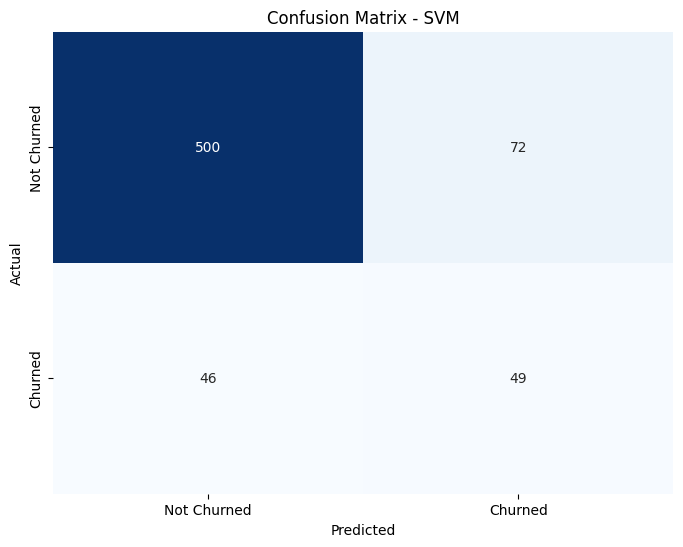

In [ ]:

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

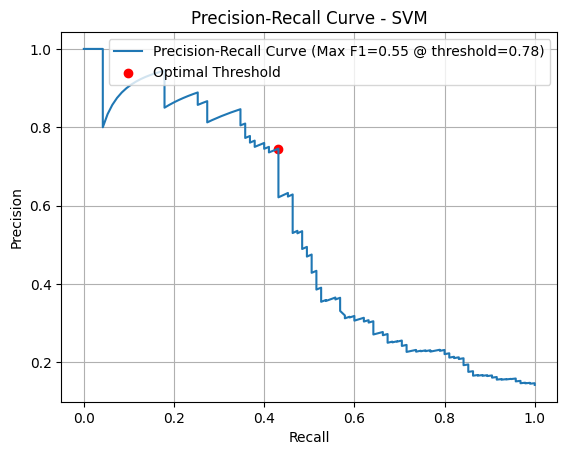

In [ ]:
# Precision-Recall Curve
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, best_svm.predict_proba(X_test)[:,1])
f1_scores_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
f1_scores_svm = [0 if x != x else x for x in f1_scores_svm]
optimal_idx_svm = np.argmax(f1_scores_svm)
optimal_threshold_svm = thresholds_svm[optimal_idx_svm]
optimal_f1_svm = f1_scores_svm[optimal_idx_svm]

plt.plot(recall_svm, precision_svm, label=f'Precision-Recall Curve (Max F1={optimal_f1_svm:.2f} @ threshold={optimal_threshold_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.scatter(recall_svm[optimal_idx_svm], precision_svm[optimal_idx_svm], color='red', label=f'Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

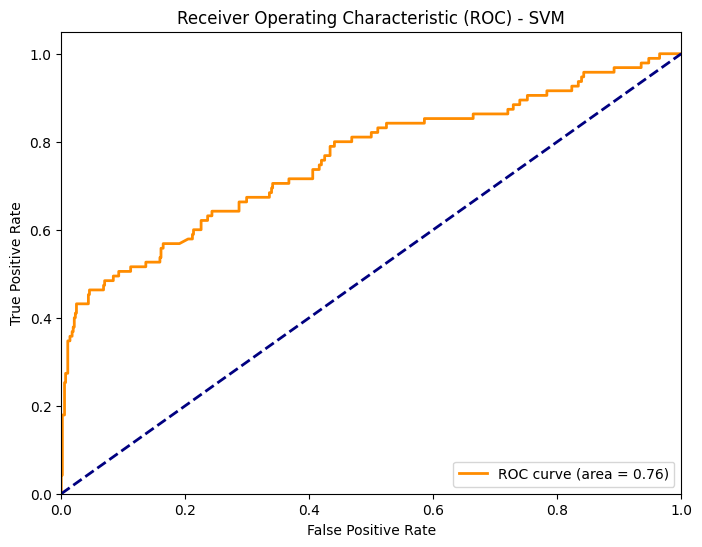

In [ ]:

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()

## **Random Forest Classifier**

In [ ]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Fit the GridSearchCV object to the data
rf_grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best score
print("Best parameters (Random Forest):", rf_grid_search.best_params_)
print("Best score (Random Forest):", rf_grid_search.best_score_)

# Get the best estimator
best_rf_clf = rf_grid_search.best_estimator_

Best parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score (Random Forest): 0.9547119554729475


In [ ]:
# Make predictions on the test set
y_pred_rf = best_rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       572
        True       0.81      0.66      0.73        95

    accuracy                           0.93       667
   macro avg       0.88      0.82      0.84       667
weighted avg       0.93      0.93      0.93       667



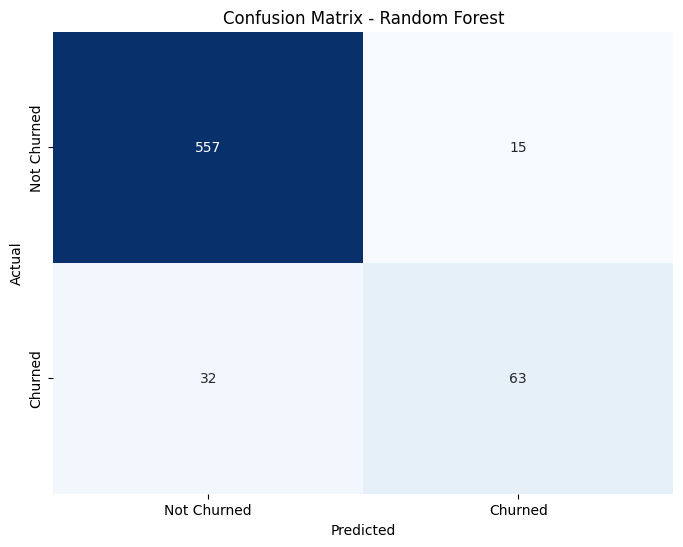

In [ ]:

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

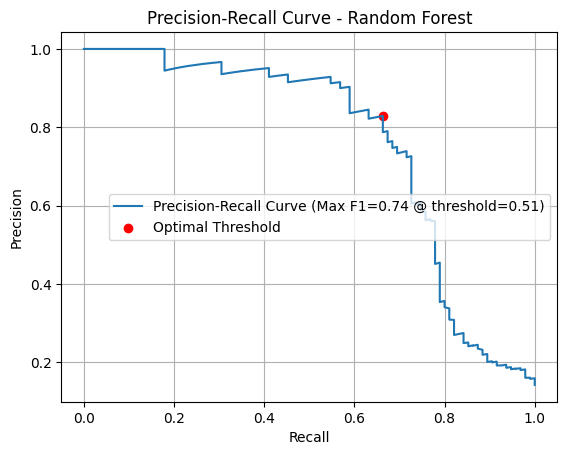

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_clf.predict_proba(X_test)[:,1])

f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = [0 if x != x else x for x in f1_scores] # handles cases where precision+recall is zero

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

plt.plot(recall, precision, label=f'Precision-Recall Curve (Max F1={optimal_f1:.2f} @ threshold={optimal_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

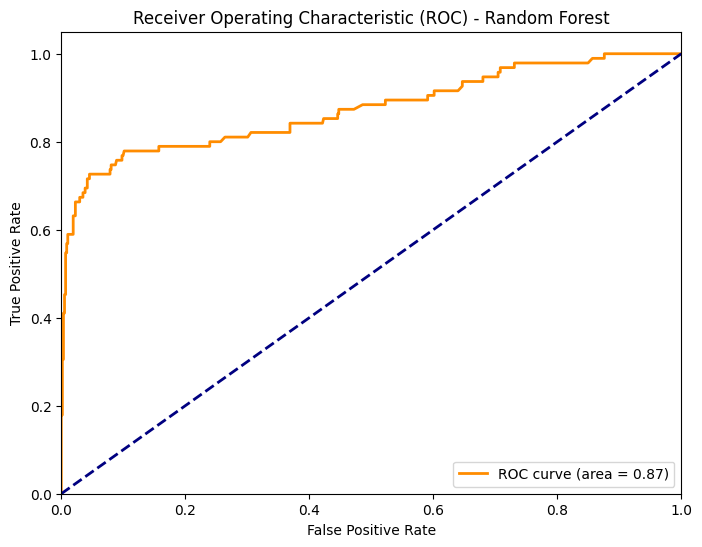

In [ ]:
# Calculate ROC curve for the best Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_rf_clf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

## **Gradient Boosting Machines**

In [ ]:
# Define the parameter grid for Gradient Boosting
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV for Gradient Boosting
gbm_grid_search = GridSearchCV(estimator=gbm_clf, param_grid=gbm_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Fit the GridSearchCV object to the data
gbm_grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
print("Best parameters (GBM):", gbm_grid_search.best_params_)
print("Best score (GBM):", gbm_grid_search.best_score_)


Best parameters (GBM): {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score (GBM): 0.9576477548574504


In [ ]:
# Get the best estimator
best_gbm_clf = gbm_grid_search.best_estimator_

# Make predictions on the test set
y_pred_gbm = best_gbm_clf.predict(X_test)
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       572
        True       0.86      0.68      0.76        95

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.94      0.94      0.94       667



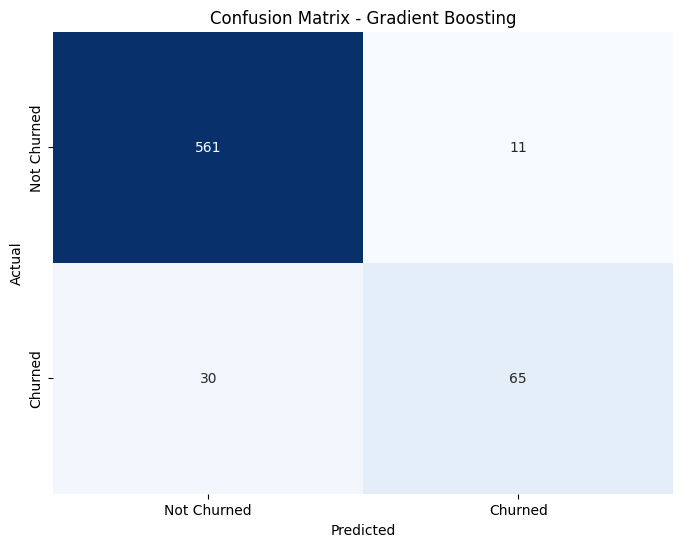

In [ ]:
# Confusion Matrix for Gradient Boosting
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

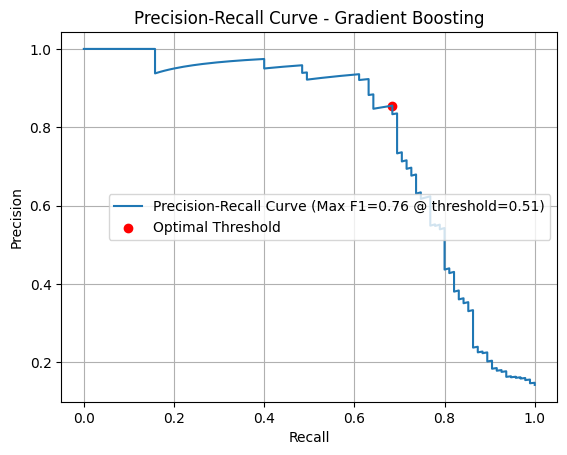

In [ ]:

precision, recall, thresholds = precision_recall_curve(y_test, best_gbm_clf.predict_proba(X_test)[:, 1])

f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = [0 if x != x else x for x in f1_scores]  # Handle cases where precision+recall is zero

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

plt.plot(recall, precision, label=f'Precision-Recall Curve (Max F1={optimal_f1:.2f} @ threshold={optimal_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

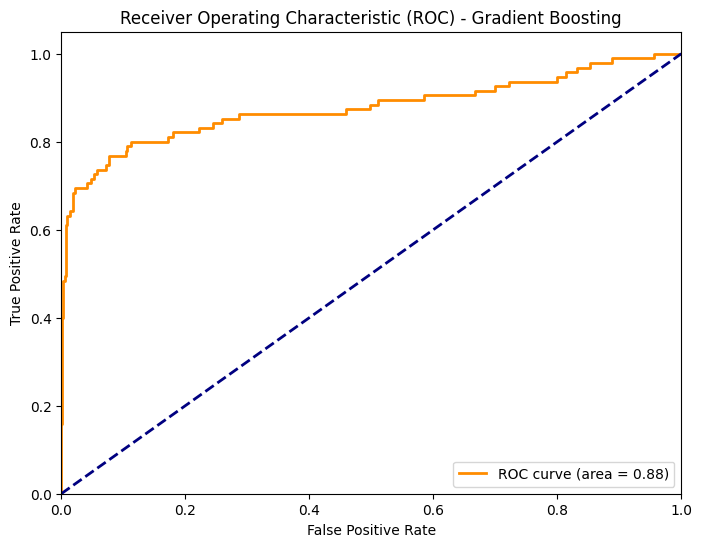

In [ ]:
# Calculate ROC curve for the best GBM Classifier
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, best_gbm_clf.predict_proba(X_test)[:, 1])
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plot ROC curve for GBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()